In [23]:
import gym
import pandas as pd
import numpy as np 
from collections import defaultdict
from pprint import pprint
import tqdm

# Create the Blackjack environment
env = gym.make("Blackjack-v1")

# Define the policy function
def policy(state):
    # Assuming state is a tuple where the first element is the user's sum
    return 0 if state[0] > 19 else 1

# Define the function to generate an episode
def generate_episode(policy=policy, env=env):
    done = True
    trajectory = []
    while True:
        if done:
            St,_ = env.reset()
            Rt=None
            done = False
        else:
            St, Rt, done,_, _ = env.step(At)
        
        At = policy(St) 
        trajectory.append((St, Rt, At, done))   
        if done:
            break
    return trajectory, len(trajectory) - 1

# Generate an episode
trajectory, length = generate_episode(policy, env)
pprint(trajectory)


[((16, 9, False), None, 1, False),
 ((20, 9, False), 0.0, 0, False),
 ((20, 9, False), 1.0, 0, True)]


c:\Users\roozu\anaconda3\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [24]:
def first_vist(policy,number_episode=1, gamma=0.99):
    V=defaultdict()
    returns=defaultdict(list)
    for i in tqdm.trange(number_episode):
        traj, T =generate_episode()
        G=0 
        for t in range(T-1,-1,-1):
            St,_,_,_=traj[t]
            _,Rt,_,_=traj[t+1]
            G= gamma*G+R
            states_0_t_1=[traj[i][0] for i in range(0,t)]
            
            if St not in states_0_t_1:
                returns[St].append(G)
                V[St]=np.average(returns[St])
            
            
            
first_vist(policy,number_episode=10)

100%|██████████| 10/10 [00:00<?, ?it/s]


[((12, 8, False), None, 1, False),
 ((14, 8, False), 0.0, 1, False),
 ((16, 8, False), 0.0, 1, False),
 ((24, 8, False), -1.0, 0, True)]


100%|██████████| 500000/500000 [05:17<00:00, 1574.09it/s]


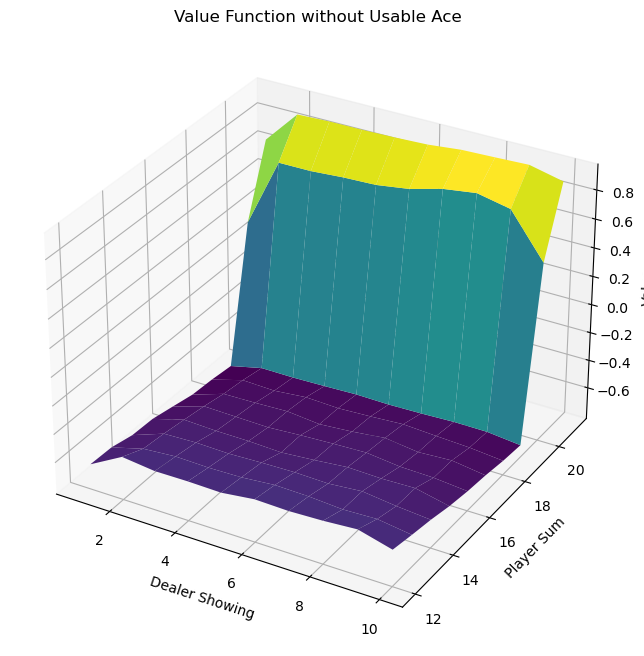

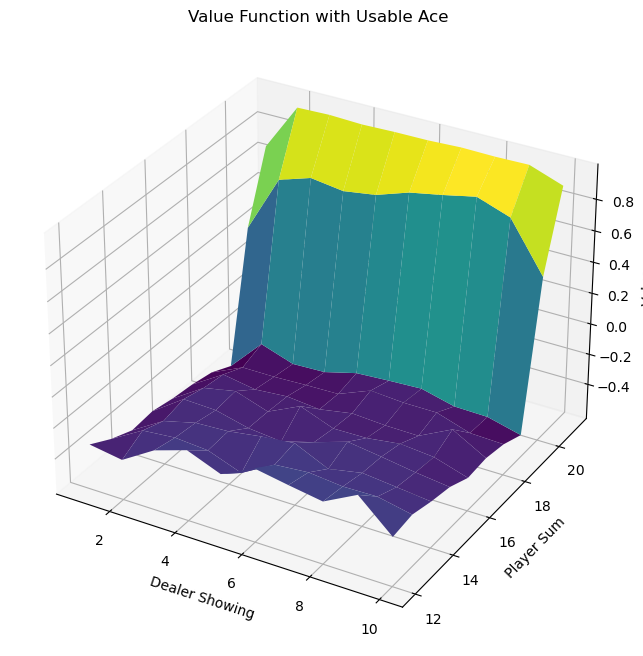

In [27]:
# %%
import gym
import pandas as pd
import numpy as np 
from collections import defaultdict
from pprint import pprint
import tqdm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create the Blackjack environment
env = gym.make("Blackjack-v1")

# Define the policy function
def policy(state):
    # Assuming state is a tuple where the first element is the user's sum
    return 0 if state[0] > 19 else 1

# Define the function to generate an episode
def generate_episode(policy=policy, env=env):
    done = True
    trajectory = []
    while True:
        if done:
            St,_ = env.reset()
            Rt=None
            done = False
        else:
            St, Rt, done,_, _ = env.step(At)
        
        At = policy(St) 
        trajectory.append((St, Rt, At, done))   
        if done:
            break
    return trajectory, len(trajectory) - 1

# Generate an episode
trajectory, length = generate_episode(policy, env)
pprint(trajectory)

# %%
def first_visit(policy, number_episodes=500000, gamma=0.99):
    V = defaultdict(float)
    returns = defaultdict(list)
    for i in tqdm.trange(number_episodes):
        traj, T = generate_episode(policy, env)
        G = 0 
        for t in range(T-1, -1, -1):
            St, _, _, _ = traj[t]
            _, Rt, _, _ = traj[t+1]
            G = gamma * G + Rt
            states_0_t_1 = [traj[i][0] for i in range(0, t)]
            
            if St not in states_0_t_1:
                returns[St].append(G)
                V[St] = np.mean(returns[St])
    return V

V = first_visit(policy, number_episodes=500000)

# Split the value function into two dictionaries: one for states with an ace and one for states without an ace
V_no_ace = {(player_sum, dealer_sum): val for ((player_sum, dealer_sum, ace), val) in V.items() if not ace}
V_ace = {(player_sum, dealer_sum): val for ((player_sum, dealer_sum, ace), val) in V.items() if ace}

# Function to plot the value function
def plot_value_function(V, title):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    x = np.arange(1, 11)
    y = np.arange(12, 22)
    X, Y = np.meshgrid(x, y)
    Z = np.array([[V.get((y, x), 0) for x in range(1, 11)] for y in range(12, 22)])
    ax.plot_surface(X, Y, Z, cmap='viridis')
    ax.set_xlabel('Dealer Showing')
    ax.set_ylabel('Player Sum')
    ax.set_zlabel('Value')
    ax.set_title(title)
    plt.show()

# Plot the value function for states with and without an ace
plot_value_function(V_no_ace, 'Value Function without Usable Ace')
plot_value_function(V_ace, 'Value Function with Usable Ace')
